In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from matplotlib.ticker import ScalarFormatter
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')

In [12]:
# Read coverage per base file and add column names to the file
header = ["chr", "start", "end", "feature", "base", "17NR2122", "17NR2123", 
          "17NR2124", "17NR2125", "17NR2126", "17NR2127", "17NR2128", "17NR2129", 
          "17NR2130", "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
          "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", "17NR2141", 
          "17NR2142", "17NR2143", "17NR2144", "17NR2145", "17NR2146", "17NR2147", 
          "17NR2148", "17NR2149", "17NR2150", "17NR2151", "17NR2152", "17NR2153", 
          "17NR2154"]
df = pd.read_csv("./pasted_coverages-chr11.tsv", sep="\t", names=header, index_col=False)
df.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2145,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154
0,11,2011230,2921230,SRS,1,42,19,78,62,34,...,46,59,41,44,44,40,54,42,53,44
1,11,2011230,2921230,SRS,2,46,19,78,64,34,...,46,60,41,44,46,40,54,42,54,46
2,11,2011230,2921230,SRS,3,46,19,79,65,34,...,47,61,42,45,47,42,54,42,56,47
3,11,2011230,2921230,SRS,4,47,19,81,67,34,...,48,61,44,47,48,46,55,43,57,49
4,11,2011230,2921230,SRS,5,49,20,85,69,34,...,48,62,46,48,48,46,59,44,60,49


In [13]:
dic_total_reads = {"17NR2122":6794137, "17NR2123":3870331, "17NR2124":8761807, "17NR2125":7956425, 
                "17NR2126":4976172, "17NR2127":2399678, "17NR2128":5845975, "17NR2129":7520553, "17NR2130":7544035, 
                "17NR2131":8224731, "17NR2132":6843457, "17NR2133":6604556, "17NR2134":7510350, "17NR2135":7016579, 
                "17NR2136":8359478, "17NR2137":7663546, "17NR2138":9244365, "17NR2139":7487638, "17NR2140":8640616, 
                "17NR2141":7406296, "17NR2142":5602032, "17NR2143":7164379, "17NR2144":7068970, "17NR2145":9307389,
                "17NR2146":7300131, "17NR2147":7013634, "17NR2148":7278219, 
                   "17NR2149":6378808, "17NR2150":8210828, "17NR2151":8707031, 
                   "17NR2152":7102156, "17NR2153":8520552, "17NR2154":7290042}

list_samples = ["17NR2122", "17NR2123", "17NR2124", "17NR2125", 
                "17NR2127", "17NR2128", "17NR2129", "17NR2130", 
                "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
                "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", 
                "17NR2141", "17NR2142", "17NR2143", "17NR2144", "17NR2145", 
                "17NR2146", "17NR2147", "17NR2148", "17NR2149", "17NR2150", 
                "17NR2151", "17NR2152", "17NR2153", "17NR2154"]

#"17NR2126", ""
dff = df.copy()

In [14]:
for elem in list_samples:
    dff[elem] = (dff[elem]/dic_total_reads[elem])*10**5

dff["mean"] = dff.loc[:, list_samples].mean(axis=1)
list_samples = list_samples + ["mean"]

dff.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154,mean
0,11,2011230,2921230,SRS,1,0.618180,0.490914,0.890227,0.779244,34,...,0.808205,0.584576,0.604544,0.689784,0.487162,0.620188,0.59137,0.622025,0.603563,0.634396
1,11,2011230,2921230,SRS,2,0.677054,0.490914,0.890227,0.804381,34,...,0.821903,0.584576,0.604544,0.721138,0.487162,0.620188,0.59137,0.633762,0.630998,0.643802
2,11,2011230,2921230,SRS,3,0.677054,0.490914,0.901640,0.816950,34,...,0.835601,0.598834,0.618283,0.736815,0.511520,0.620188,0.59137,0.657234,0.644715,0.655805
3,11,2011230,2921230,SRS,4,0.691773,0.490914,0.924467,0.842087,34,...,0.835601,0.627350,0.645762,0.752492,0.560236,0.631673,0.60545,0.668971,0.672150,0.677839
4,11,2011230,2921230,SRS,5,0.721210,0.516752,0.970120,0.867224,34,...,0.849300,0.655865,0.659502,0.752492,0.560236,0.677613,0.61953,0.704180,0.672150,0.699364


In [15]:
# Do not take into account positions with coverage = 0, they correspond to repetitive sequences
da = dff.loc[dff['base'] > 204000][dff['base'] < 204454][dff["mean"] != 0.0].reset_index(drop=True)
da.shape

/home/ugdg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/ugdg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(453, 39)

In [16]:
# Create column with the ratio between the sample and mean of samples
da["division"] = da["17NR2124"]/da["mean"]

In [17]:
da["division"].mean()

5.629259506917243

In [5]:
c = dff[list_samples].apply(zscore)
for el in list_samples:
    dff[el] = c[el]

for e in list_samples:
    dff[e] = dff[e] - dff["mean"]

#dff = dff.loc[dff['feature'].map(str) == "GNAS"].reset_index(drop=True)
    
dff.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154,mean
0,11,2011230,2921230,SRS,1,-0.024495,-0.072022,0.085259,0.053511,0.035060,...,0.083612,0.001976,0.011621,0.029338,-0.037436,-0.011134,0.011592,0.004915,-0.013502,0.0
1,11,2011230,2921230,SRS,2,-0.006055,-0.075432,0.081849,0.058577,0.031650,...,0.085315,-0.001434,0.008211,0.037763,-0.040846,-0.014544,0.008182,0.005874,-0.006877,0.0
2,11,2011230,2921230,SRS,3,-0.010406,-0.079784,0.081693,0.058464,0.027299,...,0.086075,-0.000458,0.009170,0.039329,-0.035672,-0.018896,0.003830,0.010259,-0.006211,0.0
3,11,2011230,2921230,SRS,4,-0.012932,-0.087772,0.082095,0.058952,0.019311,...,0.078087,0.002210,0.011803,0.037258,-0.024611,-0.022698,0.001197,0.006640,-0.004164,0.0
4,11,2011230,2921230,SRS,5,-0.009810,-0.085965,0.091072,0.059624,0.011507,...,0.075396,0.005063,0.009310,0.029454,-0.032414,-0.013757,-0.001253,0.011942,-0.011968,0.0


In [8]:
query = ["17NR2133", "17NR2134", "17NR2135", 
                "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", 
                "17NR2141", "17NR2142", "17NR2143", "17NR2144", "17NR2145", 
                "17NR2146", "17NR2147", "17NR2148", "17NR2149", "17NR2150", 
                "17NR2151", "17NR2152", "17NR2153"]
control = ["17NR2122", "17NR2123", "17NR2124", "17NR2125", "17NR2127", "17NR2128", "17NR2129", "17NR2130", 
                "17NR2131", "17NR2132", "17NR2154"]
#"17NR2126"

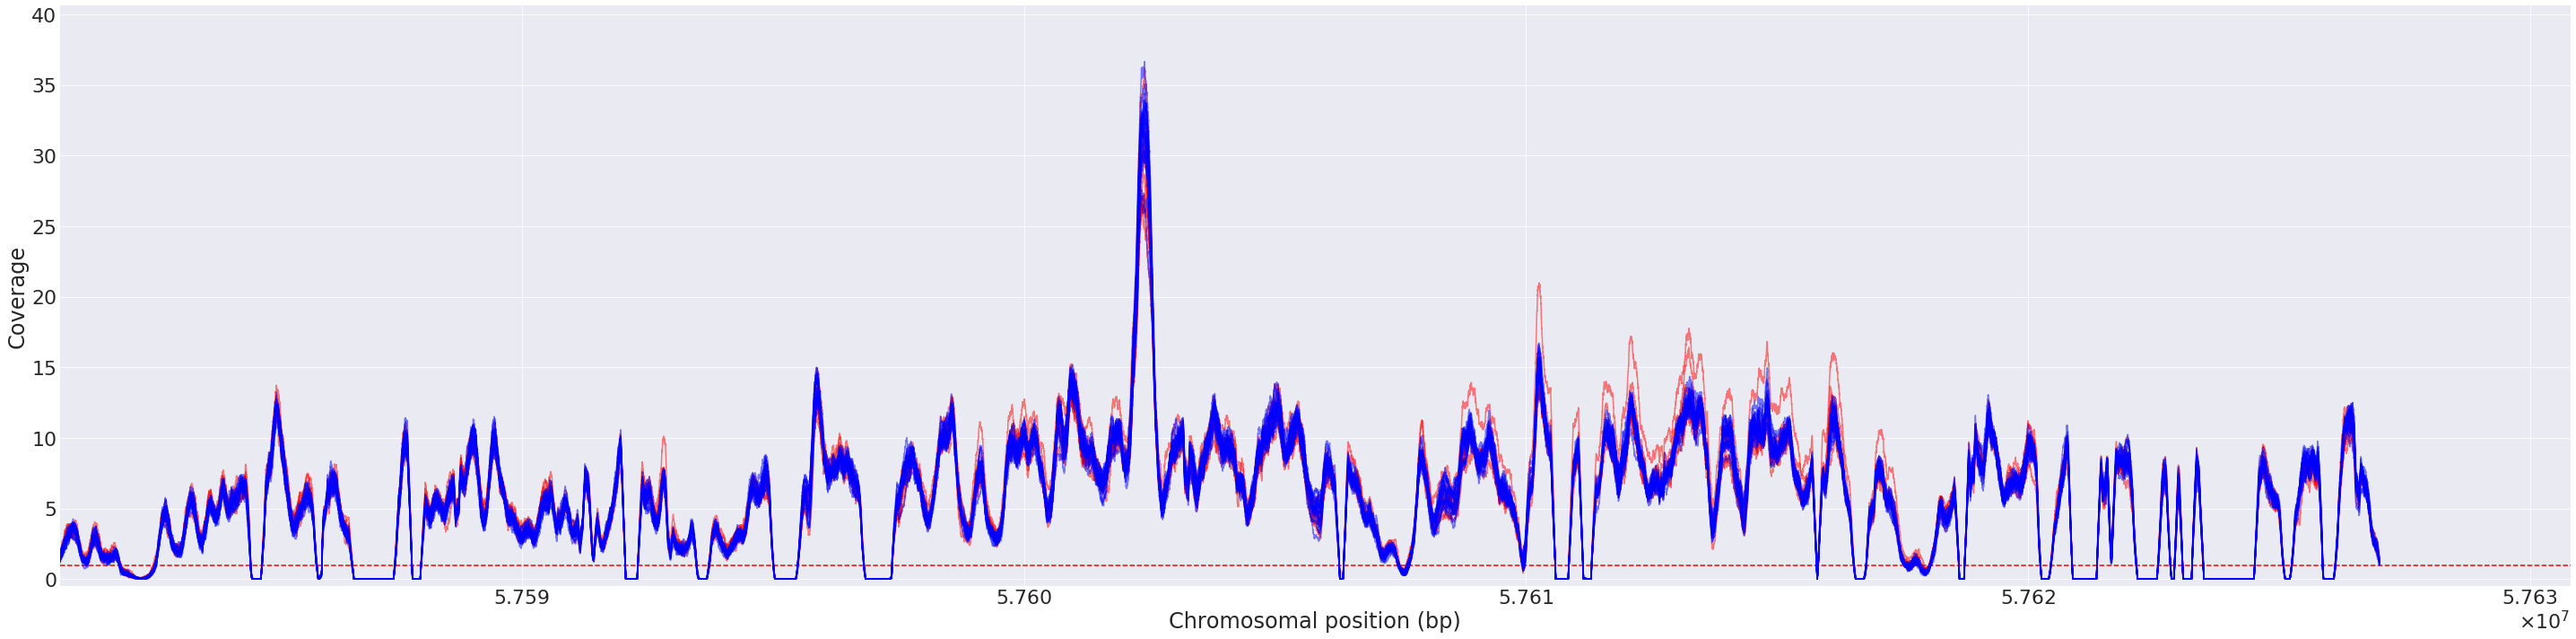

In [18]:
## Different plot

dff["index"] = dff.index

# Create a plot per gene
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)

# Plot limits
#ax1.set_ylim(-2, 2)
ax1.set_ylim(-0.5, dff["mean"].max()+10)
#ax1.set_xlim(dff.loc[0, "start"], dff['index'].max() + dff.loc[0, "start"])
ax1.set_xlim(dff.loc[0, "start"] + 200000, dff.loc[0, "start"] + 300000)

ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.xaxis.offsetText.set_fontsize(22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax1.hlines(y=1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')
ax1.hlines(y=-1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')


#for el in control:
#    ax1.plot(dff['index'] + dff.loc[0, "start"], dff[el], alpha=0.5, color='red')
    
#for e in query:
#    ax1.plot(dff['index'] + dff.loc[0, "start"], dff[e], alpha=0.5, color='blue')
ax1.plot(dff['index'] + dff.loc[0, "start"], dff["17NR2122"], alpha=0.5, color='blue')
#ax1.plot(dff["index"] + dff.loc[0, "start"], dff["mean"], alpha=0.5, color='r', linestyle='--')


    # Getting positions to plot vertical lines separating exons
#index_positions = [2683191, 2721224]
#names = ['E11-KCNQ1', 'START-KCNQ10T1\nantisense']
        
    # Set limits for the vertical lines, it is a plot on top of a plot
#ax2 = ax1.twiny()
#ax2.set_ylim(ax1.get_ylim())
#ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
#ax2.vlines(x=index_positions, ymin=-2, ymax=ax2.get_ylim()[1], linestyle='--', 
#            alpha=0.5, color='black')
#ax2.grid(b=False)
#ax2.set_xticks(index_positions)
#ax2.set_xticklabels(names, rotation=60, minor=False, fontsize=20)

ax1.set_xlabel('Chromosomal position (bp)', fontsize=24)
ax1.set_ylabel('Coverage', fontsize=24)


fig.tight_layout()
#figname = "{}_pbcov.png".format(gene)
#figname = "chr20-57365000-57375000-ctrlVSquery.png"
#fig.savefig(os.path.join("./", figname))
plt.show()
plt.close(fig)

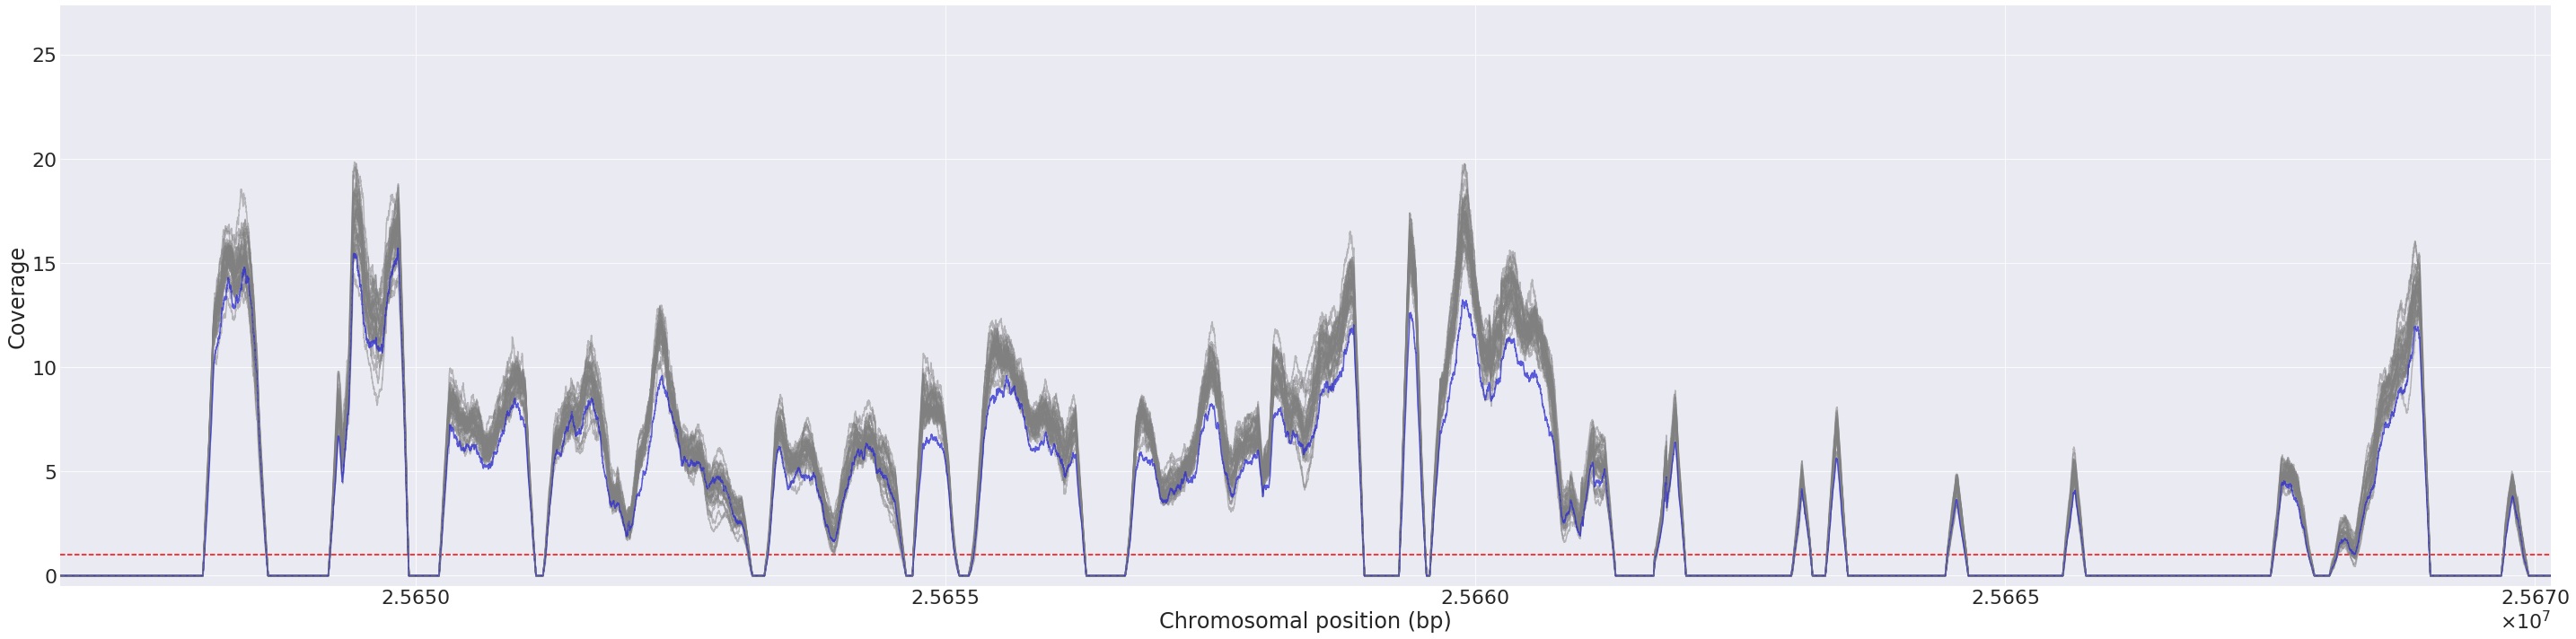

In [19]:
## BY ADDING THE START BASE WE GET X AXIS WITH CHROMOSOMIC POSSITIONS

dff["index"] = dff.index

# Create a plot per gene
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)

# Plot limits
#ax1.set_ylim(-2, 2)
ax1.set_ylim(-0.5, dff["mean"].max() + 10)
#ax1.set_xlim(dff.loc[0, "start"], dff['index'].max() + dff.loc[0, "start"])
#ax1.set_xlim(dff.loc[0, "start"], dff['index'].max() + dff.loc[0, "start"])
ax1.set_xlim(dff.loc[0, "start"] + 68500, dff.loc[0, "start"] + 92000)
ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.xaxis.offsetText.set_fontsize(22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax1.hlines(y=1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')
ax1.hlines(y=-1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')


for el in list_samples:
    ax1.plot(dff['index'] + dff.loc[0, "start"], dff[el], alpha=0.5, color='gray')
ax1.plot(dff['index'] + dff.loc[0, "start"], dff["17NR2151"], alpha=0.5, color='blue')
ax1.plot(dff["index"] + dff.loc[0, "start"], dff["mean"], alpha=0.5, color='gray', linestyle='--')


    # Getting positions to plot vertical lines separating exons
#index_positions = [2683191, 2721224]
#names = ['E11-KCNQ1', 'START-KCNQ10T1\nantisense']
        
    # Set limits for the vertical lines, it is a plot on top of a plot
#ax2 = ax1.twiny()
#ax2.set_ylim(ax1.get_ylim())
#ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
#ax2.vlines(x=index_positions, ymin=-2, ymax=ax2.get_ylim()[1], linestyle='--', 
#            alpha=0.5, color='black')
#ax2.grid(b=False)
#ax2.set_xticks(index_positions)
#ax2.set_xticklabels(names, rotation=60, minor=False, fontsize=20)

ax1.set_xlabel('Chromosomal position (bp)', fontsize=24)
ax1.set_ylabel('Coverage', fontsize=24)


fig.tight_layout()
#figname = "{}_pbcov.png".format(gene)
#figname = "57365-57375-{}numreads-zscore.png".format("17NR2122")
#fig.savefig(os.path.join("./", figname))
plt.show()
plt.close(fig)

In [ ]:
## LOOPED TO TAKE PICTURES BY SAMPLE
for samplename in list_samples:

    dff["index"] = dff.index

    # Create a plot per gene
    fig = plt.figure(figsize=(40,10))
    ax1 = fig.add_subplot(111)

    # Plot limits
    ax1.set_ylim(-2, 2)
    ax1.set_xlim(dff.loc[0, "start"], dff['index'].max() + dff.loc[0, "start"])
    #ax1.set_xlim(dff.loc[0, "start"], dff.loc[0, "start"] + 100000)
    #ax1.set_xlim(57250000, 57260000)
    ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1.xaxis.offsetText.set_fontsize(22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    ax1.hlines(y=1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')
    ax1.hlines(y=-1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')


    for el in list_samples:
        ax1.plot(dff['index'] + dff.loc[0, "start"], dff[el], alpha=0.5, color='gray')
    ax1.plot(dff['index'] + dff.loc[0, "start"], dff[samplename], alpha=0.5, color='blue')
    ax1.plot(dff["index"] + dff.loc[0, "start"], dff["mean"], alpha=0.5, color='r', linestyle='--')


    # Getting positions to plot vertical lines separating exons
#index_positions = [2683191, 2721224]
#names = ['E11-KCNQ1', 'START-KCNQ10T1\nantisense']
        
    # Set limits for the vertical lines, it is a plot on top of a plot
#ax2 = ax1.twiny()
#ax2.set_ylim(ax1.get_ylim())
#ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
#ax2.vlines(x=index_positions, ymin=-2, ymax=ax2.get_ylim()[1], linestyle='--', 
#            alpha=0.5, color='black')
#ax2.grid(b=False)
#ax2.set_xticks(index_positions)
#ax2.set_xticklabels(names, rotation=60, minor=False, fontsize=20)

    ax1.set_xlabel('Chromosomal position (bp)', fontsize=24)
    ax1.set_ylabel('Coverage', fontsize=24)


    fig.tight_layout()
#figname = "{}_pbcov.png".format(gene)
    figname = "chr11-{}.png".format(samplename)
    fig.savefig(os.path.join("./", figname))
#plt.show()
    plt.close(fig)